In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv("Weight-height.csv")

In [ ]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [ ]:
df.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [ ]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [ ]:
df.isnull().sum()

,0
Height(Inches),0
Weight(Pounds),0


In [ ]:
df2 = df.head(50)

In [ ]:
df2

,Height(Inches),Weight(Pounds)
0,65.78331,112.99250
1,71.51521,136.48730
2,69.39874,153.02690
3,68.21660,142.33540
4,67.78781,144.29710
5,68.69784,123.30240
6,69.80204,141.49470
7,70.01472,136.46230
8,67.90265,112.37230
9,66.78236,120.66720


Text(0, 0.5, 'Height')

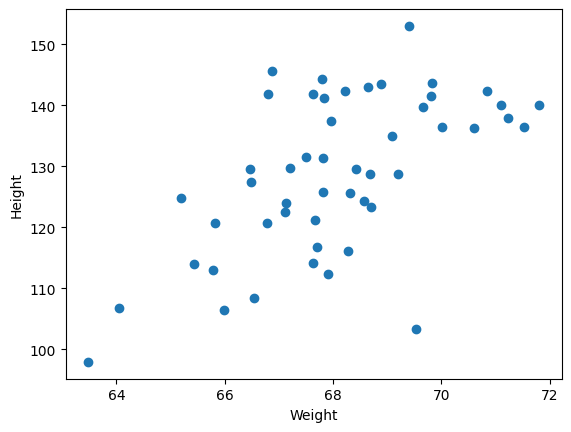

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df2['Height(Inches)'],df2['Weight(Pounds)'])
plt.xlabel('Weight')
plt.ylabel("Height")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# dataset divided into independent and depepndant feature
x = df2[['Height(Inches)']] # independent Feature
y = df2['Weight(Pounds)']  #dependant feature

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((40, 1), (10, 1))

In [ ]:
y_train.shape,y_test.shape

((40,), (10,))

In [ ]:
#scaling down the veriable
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[-0.51393673],
       [-2.21347606],
       [ 0.81789967],
       [ 0.34708033],
       [ 0.3342309 ],
       [ 0.9827343 ],
       [ 1.54783261],
       [-0.46298171],
       [-0.12671618],
       [-0.50584635]])

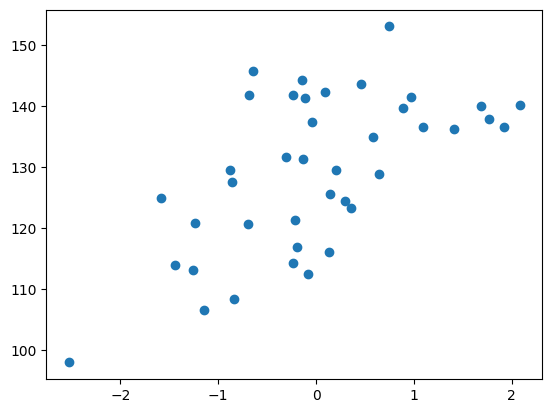

In [ ]:
plt.scatter(x_train ,y_train)

In [ ]:
#model training
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression()

In [ ]:
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
regression.intercept_

129.30829524999993

In [ ]:
regression.coef_

array([7.58799312])

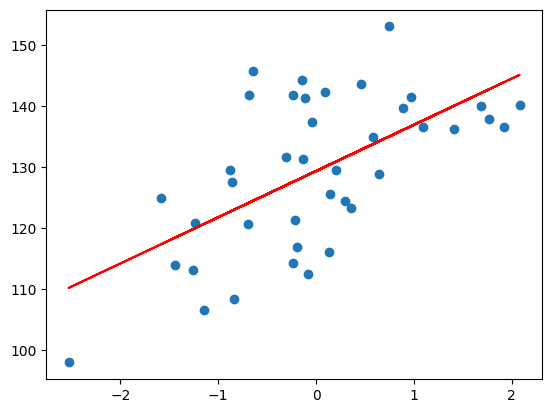

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regression.predict(x_train) , 'r')

In [ ]:
# prediction for test data
y_pred_test =  regression.predict(x_test)

In [ ]:
y_pred_test

array([125.40854685, 112.51245414, 135.51451231, 131.94193843,
       131.84443703, 136.76527639, 141.05323845, 125.79519323,
       128.34677378, 125.46993662])

In [ ]:
y_test

,Weight(Pounds)
13,122.4618
39,106.7115
30,103.3016
45,128.7639
17,142.9733
48,143.6215
26,142.4235
25,129.7244
32,125.7886
19,124.0449


In [ ]:
## performance matrics ,MAE,MSE,RMSE
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

128.68566921280973
7.14064170485922
11.343970610540637


In [ ]:
## Acuracy of the model --> R-squerd ,Adjusted R -squred
from sklearn.metrics import r2_score

In [ ]:
score = r2_score(y_test,y_pred_test)
score  # accureacy is bad

0.27861438263756044

In [ ]:
# adjusted r squred
1 - (1-score) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.18844118046725544